<a href="https://colab.research.google.com/github/harshitaatray/Clustering-using-mall-data/blob/main/Clustering_using_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

Unsupervised Machine Learning Models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from numpy import mean
from sklearn import preprocessing
from sklearn import cluster
from sklearn.mixture import GaussianMixture

EDA

In [ ]:
mall = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
mall.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [ ]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
mall.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Female    112
Male       88
Name: Genre, dtype: int64

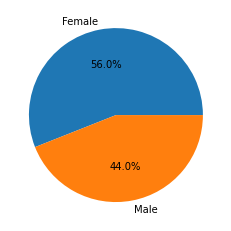

In [ ]:
plt.pie(mall['Genre'].value_counts(), labels=['Female', 'Male'],autopct='%1.1f%%')
mall['Genre'].value_counts()

Text(0, 0.5, 'Number of Count')

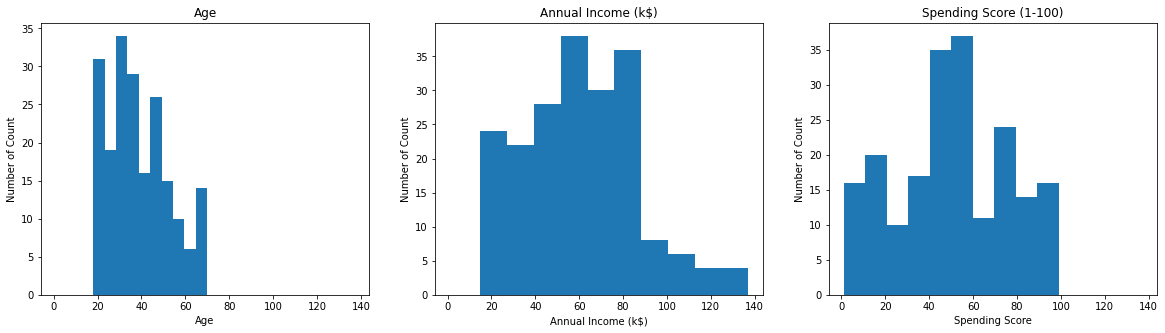

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,5), sharex = True)
ax1.hist(mall['Age'])
ax2.hist(mall['Annual Income (k$)'])
ax3.hist(mall['Spending Score (1-100)'])

ax1.title.set_text('Age')
ax2.title.set_text('Annual Income (k$)')
ax3.title.set_text('Spending Score (1-100)')

ax1.set_xlabel('Age')
ax2.set_xlabel('Annual Income (k$)')
ax3.set_xlabel('Spending Score')

ax1.set_ylabel('Number of Count')
ax2.set_ylabel('Number of Count')
ax3.set_ylabel('Number of Count')

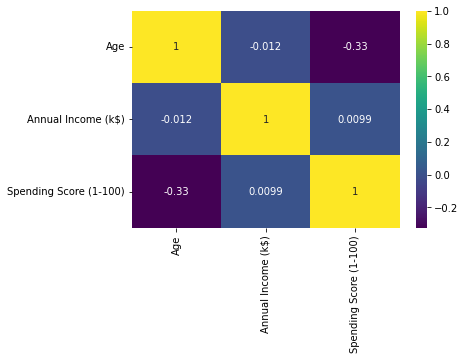

In [ ]:
corr = mall.drop('CustomerID', axis=1).corr()
sns.heatmap(corr, annot=True, cmap = 'viridis')

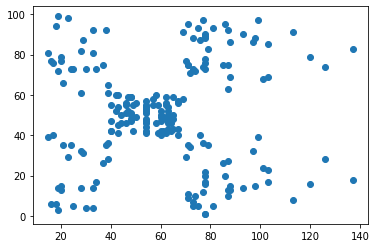

In [ ]:
plt.scatter(mall['Annual Income (k$)'], mall['Spending Score (1-100)'])

Text(0.5, 1.0, 'Income vs Age of customers')

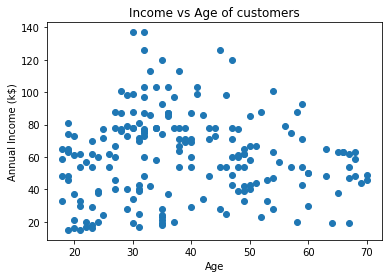

In [ ]:
plt.scatter(mall['Age'], mall['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Income vs Age of customers')

In [ ]:
mall.drop('CustomerID', axis=1, inplace = True)
mall['Genre'] = (mall['Genre']=='Male').astype('int')
mall.head()

Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      1   19                  15                      39
1      1   21                  15                      81
2      0   20                  16                       6
3      0   23                  16                      77
4      0   31                  17                      40

K Means Clustering

In [ ]:
norm = MinMaxScaler()
mall['Genre'] = norm.fit_transform(mall['Genre'].values.reshape(-1,1))
mall['Age'] = norm.fit_transform(mall['Age'].values.reshape(-1,1))
mall['Annual Income (k$)'] = norm.fit_transform(mall['Annual Income (k$)'].values.reshape(-1,1))
mall['Spending Score (1-100)'] = norm.fit_transform(mall['Spending Score (1-100)'].values.reshape(-1,1))
mall.drop('Genre', axis=1, inplace = True)

In [ ]:
mall.head()

Age  Annual Income (k$)  Spending Score (1-100)
0  0.019231            0.000000                0.387755
1  0.057692            0.000000                0.816327
2  0.038462            0.008197                0.051020
3  0.096154            0.008197                0.775510
4  0.250000            0.016393                0.397959

Text(0.5, 1.0, '5 Clusters in Annual Income vs Age plot')

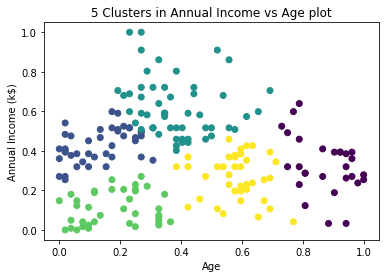

In [ ]:
kmeans = KMeans(n_clusters=5)
predicted = kmeans.fit_predict(mall.iloc[:,0:2])
mall['cluster'] = predicted
fig, ax = plt.subplots()
ax.scatter(mall['Age'], mall['Annual Income (k$)'], c=mall['cluster'])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_title('5 Clusters in Annual Income vs Age plot')

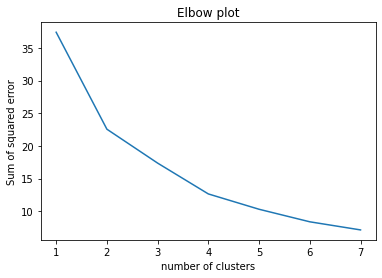

In [ ]:
k_range = range(1,8)
sse = []
for n in k_range:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(mall.iloc[:,0:3])
    sse.append(kmeans.inertia_)

plt.xlabel('number of clusters')
plt.ylabel('Sum of squared error')
plt.title('Elbow plot')
plt.plot(k_range, sse)

Text(0.5, 1.0, '4 Clusters in Annual Income vs Age plot')

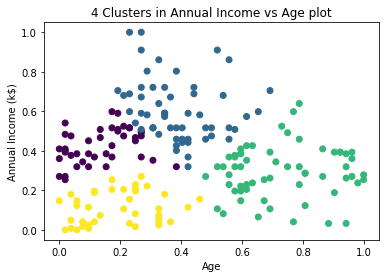

In [ ]:
kmeans = KMeans(n_clusters=4)
predicted = kmeans.fit_predict(mall.iloc[:,0:2])
mall['cluster'] = predicted
fig, ax = plt.subplots()
ax.scatter(mall['Age'], mall['Annual Income (k$)'], c=mall['cluster'])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_title('4 Clusters in Annual Income vs Age plot')

Text(0.5, 1.0, '2 Clusters in Annual Income vs Age plot')

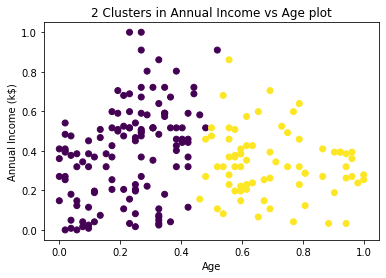

In [ ]:
kmeans1 = KMeans(n_clusters=2)
predicted1 = kmeans1.fit_predict(mall.iloc[:,0:2])
mall['cluster'] = predicted1
fig1, ax1 = plt.subplots()
ax1.scatter(mall['Age'], mall['Annual Income (k$)'], c=mall['cluster'])
ax1.set_xlabel('Age')
ax1.set_ylabel('Annual Income (k$)')
ax1.set_title('2 Clusters in Annual Income vs Age plot')

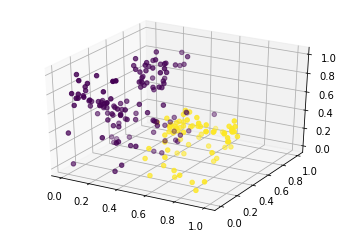

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(mall['Age'], mall['Annual Income (k$)'], mall['Spending Score (1-100)'],c=mall['cluster'])


DBSCAN

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
df = df.drop('CustomerID', axis=1)
df.head()

Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

In [ ]:
#one-hot-encoding
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Genre']
enc_ohe = OneHotEncoder(handle_unknown ='ignore')
enc_ohe.fit(df[categories])

df = OneHotEncoding(df, enc_ohe, categories)
df.head()

Age  Annual Income (k$)  Spending Score (1-100)  Genre_Female  Genre_Male
0   19                  15                      39           0.0         1.0
1   21                  15                      81           0.0         1.0
2   20                  16                       6           1.0         0.0
3   23                  16                      77           1.0         0.0
4   31                  17                      40           1.0         0.0

In [ ]:
predictors = ['Age','Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Female', 'Genre_Male']
# Standardized treatment of variables
X = preprocessing.scale(df[predictors])
X = pd.DataFrame(X)

# Build an empty list to hold the results under different parameter combinations
res = []
# Iterate over different EPS values
for eps in np.arange(0.001,1,0.05):
    # Iterate over the different min samples values
   for min_samples in range(2,10):
       dbscan = cluster.DBSCAN(eps = eps, min_samples = min_samples)
        # model fitting
       dbscan.fit(X)
        # Count the number of clustering under each parameter combination (-1 represents the outlier)
       n_clusters = len([i for i in set(dbscan.labels_) if i != -1])
        # the number of outlier
       outliners = np.sum(np.where(dbscan.labels_ == -1, 1,0))
        # Count the number of samples in each cluster
       stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
       res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners,'stats':stats})

# Store the results of the iteration in a data box
df1 = pd.DataFrame(res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: Deprecation

In [ ]:
df1

eps  min_samples  n_clusters  outliners          stats
0    0.001            2           0        200             []
1    0.001            3           0        200             []
2    0.001            4           0        200             []
3    0.001            5           0        200             []
4    0.001            6           0        200             []
..     ...          ...         ...        ...            ...
155  0.951            5           2         13      [110  77]
156  0.951            6           2         13      [110  77]
157  0.951            7           2         21      [105  74]
158  0.951            8           3         22  [105  63  10]
159  0.951            9           3         25  [104  62   9]

[160 rows x 5 columns]

In [ ]:
df1['outliners'].describe()

count    160.000000
mean     115.006250
std       76.618429
min        4.000000
25%       34.500000
50%      123.500000
75%      200.000000
max      200.000000
Name: outliners, dtype: float64

In [ ]:
df1[df1["outliners"]<5.000000]

eps  min_samples  n_clusters  outliners                  stats
144  0.901            2           5          4  [111  77   4   2   2]
152  0.951            2           5          4  [111  77   4   2   2]

In [ ]:
dbscan = cluster.DBSCAN(eps = 0.901, min_samples = 2)
# model fitting
dbscan.fit(X)

DBSCAN(eps=0.901, min_samples=2)

In [ ]:
dbscan.labels_

array([-1,  0, -1,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  3,  0,  1,
        0,  0,  1,  3,  0,  1,  0,  1,  0,  1,  0,  1,  1,  2,  1,  2,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,
        0,  1,  1,  1,  1, -1,  1,  1,  1,  1,  4, -1,  4])

GMM

In [ ]:
#GMM
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=28)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 0, 1, 0, 2, 3, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 3, 2, 3, 2, 0, 1, 3, 1, 3, 1, 3, 1, 0, 2, 3,
       1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 4, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 4, 1, 2, 2, 2, 1, 4, 2, 1, 4,
       1, 1, 1, 0, 2, 4, 4, 0, 1, 4, 2, 0, 4, 1, 2, 0, 2, 4, 1, 2, 2, 2,
       2, 4, 4, 0, 4, 4, 1, 1, 1, 1, 0, 4, 1, 0, 4, 3, 2, 0, 2, 0, 2, 0,
       4, 3, 2, 3, 4, 0, 2, 3, 4, 0, 4, 3, 2, 0, 2, 3, 4, 0, 2, 0, 4, 3,
       4, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 4, 0, 2, 0, 2, 0, 4, 3,
       2, 0, 2, 0, 4, 3, 2, 3, 4, 0, 4, 0, 4, 3, 4, 3, 2, 3, 4, 3, 4, 0,
       2, 0])

#Part 2

Final project XAI

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, auc
from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve, auc
import statsmodels.api as sm
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime

In [ ]:
heart_df = pd.read_csv('/content/drive/MyDrive/heart_disease_health_indicators_BRFSS2015.csv')
heart_df.info()
heart_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

HeartDiseaseorAttack  HighBP  HighChol  ...   Age  Education  Income
0                   0.0     1.0       1.0  ...   9.0        4.0     3.0
1                   0.0     0.0       0.0  ...   7.0        6.0     1.0
2                   0.0     1.0       1.0  ...   9.0        4.0     8.0
3                   0.0     1.0       0.0  ...  11.0        3.0     6.0
4                   0.0     1.0       1.0  ...  11.0        5.0     4.0

[5 rows x 22 columns]

EDA

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

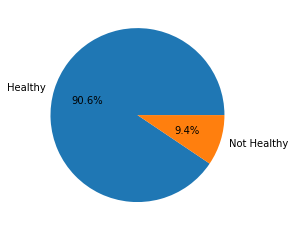

In [ ]:
plt.pie(heart_df['HeartDiseaseorAttack'].value_counts(),  labels=['Healthy', 'Not Healthy'], autopct='%1.1f%%')

heart_df['HeartDiseaseorAttack'].value_counts()

In [ ]:
round(heart_df.describe(),3)

HeartDiseaseorAttack      HighBP  ...   Education      Income
count            253680.000  253680.000  ...  253680.000  253680.000
mean                  0.094       0.429  ...       5.050       6.054
std                   0.292       0.495  ...       0.986       2.071
min                   0.000       0.000  ...       1.000       1.000
25%                   0.000       0.000  ...       4.000       5.000
50%                   0.000       0.000  ...       5.000       7.000
75%                   0.000       1.000  ...       6.000       8.000
max                   1.000       1.000  ...       6.000       8.000

[8 rows x 22 columns]

0.0    141257
1.0    112423
Name: Smoker, dtype: int64

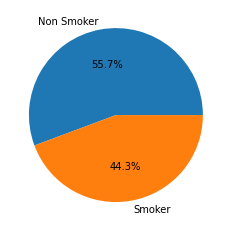

In [ ]:
plt.pie(heart_df['Smoker'].value_counts(),  labels=['Non Smoker', 'Smoker'], autopct='%1.1f%%')
heart_df['Smoker'].value_counts()

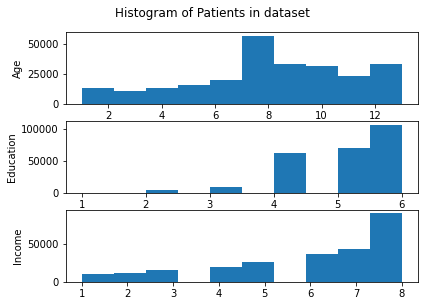

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

fig.suptitle('Histogram of Patients in dataset', y = 1.05)
ax1.hist(heart_df['Age'])
ax1.set_ylabel("Age")
ax2.hist(heart_df['Education'])
ax2.set_ylabel('Education')
ax3.hist(heart_df['Income'])
ax3.set_ylabel('Income')
fig.tight_layout(h_pad = 0, w_pad=5, pad = 1.08)
plt.show()

In [ ]:
heart_df['Age'].mean()

8.032119205298013

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000

Text(0, 0.5, 'Number of Responses')

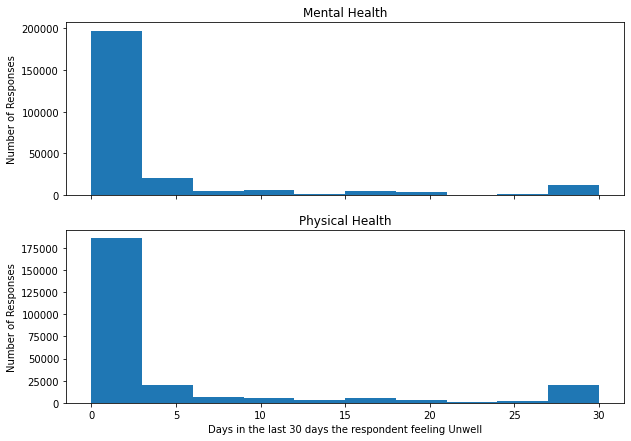

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,7), sharex = True)
ax1.hist(heart_df['MentHlth'])
ax2.hist(heart_df['PhysHlth'])
ax1.title.set_text('Mental Health')
ax2.title.set_text('Physical Health')
ax2.set_xlabel('Days in the last 30 days the respondent feeling Unwell')
ax1.set_ylabel('Number of Responses')
ax2.set_ylabel('Number of Responses')


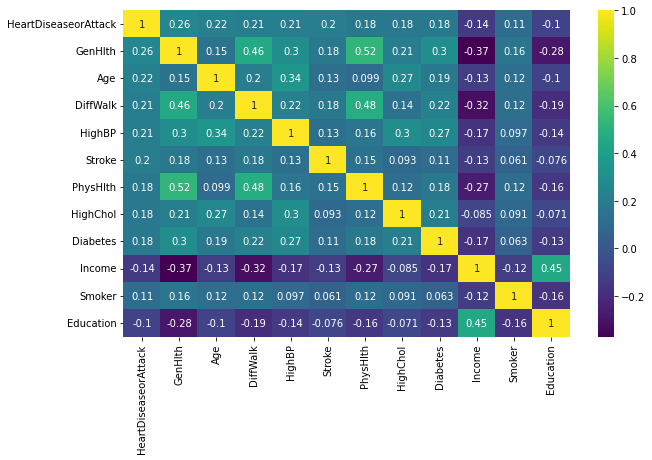

In [ ]:
k = 12 #number of variables for heatmap
cols = np.abs(heart_df.corr()).nlargest(k, 'HeartDiseaseorAttack')['HeartDiseaseorAttack'].index
cm = heart_df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Data Preprocessing

In [ ]:
def entropy(arr):
  arr = pd.DataFrame(arr)
  temp = np.array(arr.value_counts()/arr.shape[0])
  dist_vals = temp.shape[0]
  ent = -sum(temp*np.log2(temp))
  return (ent, dist_vals)

In [ ]:
e_test = [0,0,0,0,1,1,1,1,3,3,3,3,4,4,4,4]
entropy(e_test)

(2.0, 4)

In [ ]:
variable = heart_df.columns
entropy_values = []
dist_values = []

for i in variable:
  out = entropy(heart_df[i])
  entropy_values.append(out[0])
  dist_values.append(out[1])


entropy_df = pd.DataFrame({'variables': variable, 'Entropy': entropy_values, 'Max bits': np.log2(dist_values), 'ratio': entropy_values/np.log2(dist_values)})
print(entropy_df)

               variables   Entropy  Max bits     ratio
0   HeartDiseaseorAttack  0.450289  1.000000  0.450289
1                 HighBP  0.985406  1.000000  0.985406
2               HighChol  0.983323  1.000000  0.983323
3              CholCheck  0.229916  1.000000  0.229916
4                    BMI  4.529840  6.392317  0.708638
5                 Smoker  0.990661  1.000000  0.990661
6                 Stroke  0.244903  1.000000  0.244903
7               Diabetes  0.710027  1.584963  0.447977
8           PhysActivity  0.800741  1.000000  0.800741
9                 Fruits  0.947348  1.000000  0.947348
10               Veggies  0.698492  1.000000  0.698492
11     HvyAlcoholConsump  0.312159  1.000000  0.312159
12         AnyHealthcare  0.281909  1.000000  0.281909
13           NoDocbcCost  0.416728  1.000000  0.416728
14               GenHlth  2.077863  2.321928  0.894887
15              MentHlth  1.985370  4.954196  0.400745
16              PhysHlth  2.269090  4.954196  0.458014
17        

In [ ]:
y = heart_df['HeartDiseaseorAttack']
X = heart_df.drop('HeartDiseaseorAttack', axis = 1)

for i in X.columns:
  X[i]= (X[i]-min(X[i]))/(max(X[i]-min(X[i])))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33, random_state=6000, stratify=y)

#deal with the imbalanced data
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train,y_train)
from collections import Counter
print('before', Counter(y_train))
print('after:', Counter(y_train_under))

before Counter({0.0: 153957, 1.0: 16008})
after: Counter({0.0: 16008, 1.0: 16008})


In [ ]:
X.describe()

HighBP       HighChol  ...      Education         Income
count  253680.000000  253680.000000  ...  253680.000000  253680.000000
mean        0.429001       0.424121  ...       0.810087       0.721982
std         0.494934       0.494210  ...       0.197155       0.295878
min         0.000000       0.000000  ...       0.000000       0.000000
25%         0.000000       0.000000  ...       0.600000       0.571429
50%         0.000000       0.000000  ...       0.800000       0.857143
75%         1.000000       1.000000  ...       1.000000       1.000000
max         1.000000       1.000000  ...       1.000000       1.000000

[8 rows x 21 columns]

In [ ]:
X_train.describe()

HighBP       HighChol  ...      Education         Income
count  169965.000000  169965.000000  ...  169965.000000  169965.000000
mean        0.428935       0.424523  ...       0.810382       0.721869
std         0.494926       0.494272  ...       0.197197       0.295847
min         0.000000       0.000000  ...       0.000000       0.000000
25%         0.000000       0.000000  ...       0.600000       0.571429
50%         0.000000       0.000000  ...       0.800000       0.857143
75%         1.000000       1.000000  ...       1.000000       1.000000
max         1.000000       1.000000  ...       1.000000       1.000000

[8 rows x 21 columns]

KNN Algorithm

In [ ]:
heart_knn = KNeighborsClassifier(n_neighbors=14)

heart_knn.fit(X_train_under, y_train_under)

knn_pred = heart_knn.predict(X_test)

KNN LIME

In [ ]:
!pip install lime

from lime import lime_tabular

     |████████████████████████████████| 275 kB 26.8 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=84331503b3a2d5430452bcda3c5f532a4d9cf32dfded81e20482f22aca419fb0
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X),
                                              feature_names = X_train.columns,
                                              class_names = ['Healthy', 'Unhealthy'])


In [ ]:
y_test.head()

149170    0.0
22050     0.0
164032    0.0
136581    0.0
230837    1.0
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
exp = explainer.explain_instance(X_test.loc[164032],
                                 predict_fn = heart_knn.predict_proba)
exp.show_in_notebook(show_table = True)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
exp2 = explainer.explain_instance(X_test.loc[230837],
                                 predict_fn = heart_knn.predict_proba)
exp2.show_in_notebook(show_table = True)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Random Forest

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred_RF=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF))

Accuracy: 0.9029325688347369


In [ ]:
#Claasification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     75830
         1.0       0.44      0.11      0.18      7885

    accuracy                           0.90     83715
   macro avg       0.68      0.55      0.56     83715
weighted avg       0.87      0.90      0.88     83715



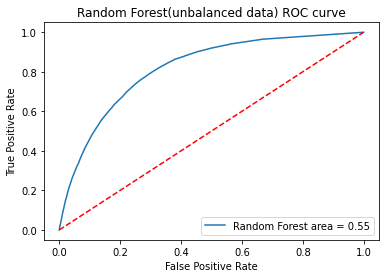

In [ ]:
RF_roc_auc = roc_auc_score(y_test, y_pred_RF)
fp, tp, threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fp, tp, label = 'Random Forest area = %0.2f' % RF_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest(unbalanced data) ROC curve')
plt.legend(loc = 'lower right')

In [ ]:
#Create a Gaussian Classifier for undersample data
clf_under = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred_RF_under=clf_under.predict(X_test)
clf_under.fit(X_train_under,y_train_under)

# prediction on test set
y_pred_RF_under=clf_under.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF_under))

Accuracy: 0.7254374962670967


SHAP

     |████████████████████████████████| 371 kB 32.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509260 sha256=8d12963e9d50cb138260c3b0650eef5d917c778186b6eda4251d036f6177b2af
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


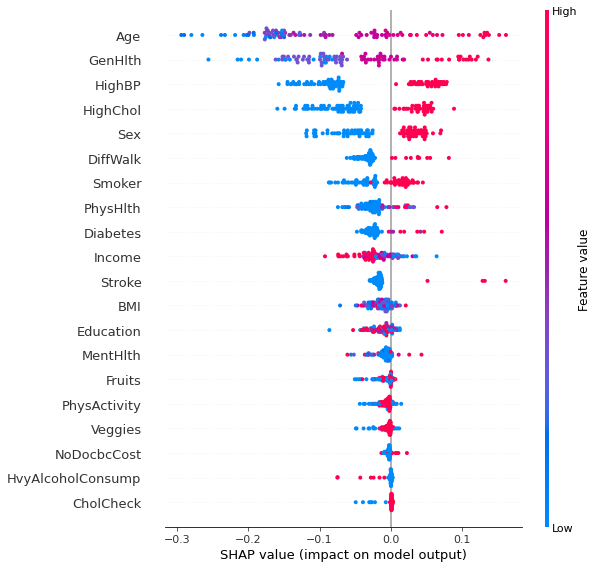

In [ ]:
!pip install shap
import shap
shap_values = shap.TreeExplainer(clf_under).shap_values(X_train_under[0:100])
shap.summary_plot(shap_values[1], X_train_under[0:100], )


In [ ]:
#Classification report
print(classification_report(y_test, y_pred_RF_under))

              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     75830
         1.0       0.23      0.80      0.35      7885

    accuracy                           0.73     83715
   macro avg       0.60      0.76      0.59     83715
weighted avg       0.90      0.73      0.78     83715



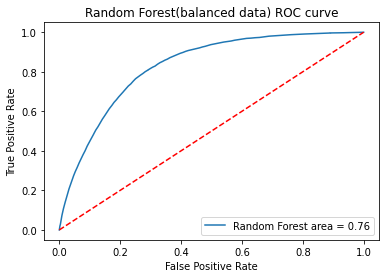

In [ ]:
RF_roc_auc_under = roc_auc_score(y_test, y_pred_RF_under)
fp, tp, threshold = roc_curve(y_test, clf_under.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fp, tp, label = 'Random Forest area = %0.2f' % RF_roc_auc_under)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest(balanced data) ROC curve')
plt.legend(loc = 'lower right')